In [1]:
import task_reader as tr
import os
import pandas as pd
import copy
%load_ext autoreload
%autoreload 2

In [2]:
def walk_through_files(path, file_extension='.md'):
    for (dirpath, dirnames, filenames) in os.walk(path):
        for filename in filenames:
            if filename.endswith(file_extension):
                yield os.path.join(dirpath, filename)

2023-10-02
{'date': '2023-10-02', 'task_mode': 'Learning_Mode', 'vd': 0, 'd': 0, 'n': 69, 'p': 0, 'vp': 0, 'work_time': 69, 'elapsed_time': 69, 'breaks': 0, 'productivity_pulse': 50.0}
1
2023-10-02
{'date': '2023-10-02', 'task_mode': 'Job_Mode', 'vd': 40, 'd': 0, 'n': 23, 'p': 0, 'vp': 0, 'work_time': 63, 'elapsed_time': 63, 'breaks': 0, 'productivity_pulse': 34.12698412698413}
2
2023-09-16
{'date': '2023-09-16', 'task_mode': 'Job_Mode', 'vd': 0, 'd': 90, 'n': 0, 'p': 63, 'vp': 0, 'work_time': 153, 'elapsed_time': 180, 'breaks': 2, 'productivity_pulse': 45.588235294117645}
3
2023-09-15
can't do that
{'date': '2023-09-15', 'task_mode': 'Job_Mode', 'vd': 0, 'd': 0, 'n': 0, 'p': 0, 'vp': 0, 'work_time': 0, 'elapsed_time': 0, 'breaks': 0, 'productivity_pulse': 0}
4
2023-10-02
{'date': '2023-10-02', 'task_mode': 'Development_Mode', 'vd': 0, 'd': 0, 'n': 0, 'p': 36, 'vp': 0, 'work_time': 36, 'elapsed_time': 36, 'breaks': 0, 'productivity_pulse': 75.0}
5
2023-09-16
{'date': '2023-09-16', 'tas

<AxesSubplot: >

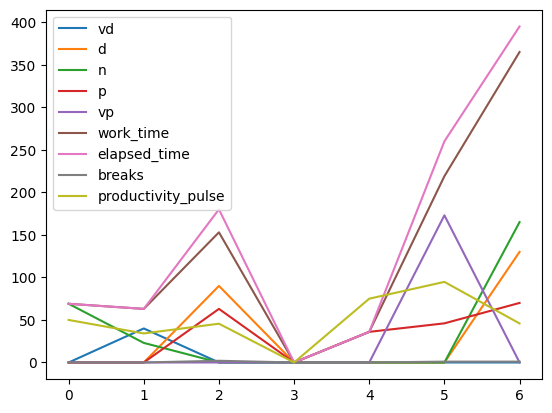

In [8]:
### We have to make it not exclusive to a particular date
path = "../../Accountability/Dailies/"
dir_list = os.listdir(path)
# print(dir_list)
# for filename in dir_list:
#     with open(path, 'r') as f:
#         tr.task_splitter(filename, f)
tasks = []      
for fname in walk_through_files(path):
    date = os.path.basename(fname).split('.')[0]
    task_mode = fname.split('/')[-2]
    print(date)
    note_details = tr.task_features(date, task_mode, fname)
    print(note_details)
    tasks.append(note_details.copy())
    print(len(tasks))


df = pd.DataFrame.from_records(tasks)
df.head(len(tasks))

df.plot(df.productivity_pulse, kind='line')

# df_dailies = df.groupby('date')
# print(df_dailies.productivity_pulse.mean())
# means = df_dailies.productivity_pulse.mean()
# print(means)
# df.plot(means, kind='line')
        
        